MovieWriter ffmpeg unavailable; using Pillow instead.


Procesando frame 240/240

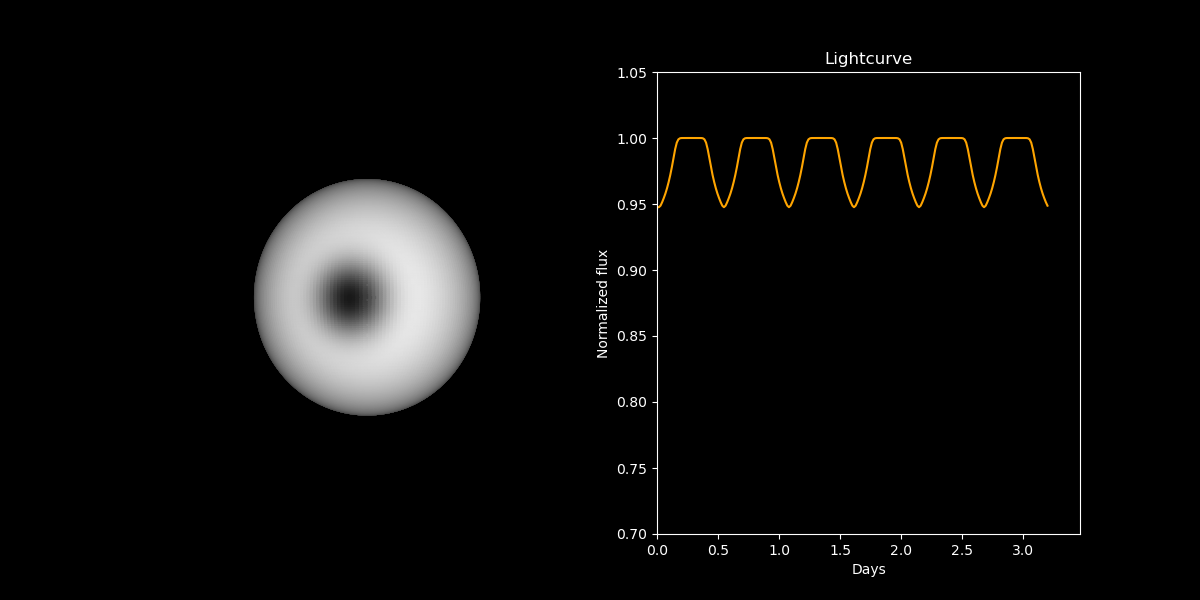

In [2]:
%matplotlib ipympl
import numpy as np
import astropy.units as u
from astropy.constants import R_sun
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from sklearn.preprocessing import normalize

# Stellar parameters 
r = 10* u.R_sun
res = 200

#
theta = np.linspace(0, 2*np.pi, res)
phi = np.linspace(0, np.pi, res)

#meshgrid for creation of the sphere surface
theta_mesh, phi_mesh = np.meshgrid(theta, phi)

x = r * np.sin(phi_mesh) * np.cos(theta_mesh)
y = r * np.sin(phi_mesh) * np.sin(theta_mesh)
z = r * np.cos(phi_mesh)

# gray texture 
gray_texture = np.ones((res, res))  # intensidad 1 = blanco

# parameters position of the spot
spot_theta_deg = 0#------>Longitude
spot_phi_deg = 90#------>Latitude
spot_radius_deg = 25

# convertion function 
def convertion_radians(degree):
    return np.deg2rad(degree)
    
                                                                
spot_phi_rad = convertion_radians(spot_phi_deg)
spot_radius_rad = convertion_radians(spot_radius_deg)

# Point of view of the sphere

elev = 0
azim = 0

elev_rad = convertion_radians(elev)
azim_rad = convertion_radians(azim)

v_x = np.cos(elev_rad) * np.cos(azim_rad)
v_y = np.cos(elev_rad) * np.sin(azim_rad)
v_z = np.sin(elev_rad)

# Limb darkening
mu = (x * v_x + y * v_y + z * v_z) / r
mu = np.clip(mu, 0, 1)


constant = 0.8  # limb darkening coefficient

# limb darkening function 
def limbdarkening(u):
    return (1 - u * (1 - mu))
lineal_darkening = limbdarkening(constant)
gray_texture *= lineal_darkening

#movement function
def get_spot_theta_rad(initial_deg, angular_velocity, frame, total_frames):
   
 
    initial_rad = np.deg2rad(initial_deg)
    delta_theta = angular_velocity * np.pi * frame / total_frames
    return initial_rad + delta_theta
    


# Figura
plt.style.use('dark_background')# -----> dark background
fig = plt.figure(figsize=(12, 6))

ax_sphere = fig.add_subplot(121, projection='3d')
ax_curve = fig.add_subplot(122)
ax_sphere.set_box_aspect((0.98, 1, 0.95))#-------> symtries of the sun 
ax_sphere.set_axis_off()

ax_curve.set_title('Lightcurve', color='white')
ax_curve.set_xlabel('Days')
ax_curve.set_ylabel('Normalized flux')
ax_curve.set_xlim(0, 260/75)
ax_curve.set_ylim(0.7, 1.05)
ax_curve.set_facecolor('black')
line_curve, = ax_curve.plot([], [], color='orange')

# Flux saves
fluxes = []

#

def animate(i):
    ax_sphere.clear()
    ax_sphere.set_axis_off()
    ax_sphere.view_init(elev=elev, azim=azim)

    # Copia de textura para esta animación
    texture = np.copy(gray_texture)

    # movement of the spot
    #spot_theta_rad = np.deg2rad(spot_theta_deg) + (4*np.pi*i/260)#------>movement of the spott
    spot_theta_rad = get_spot_theta_rad(spot_theta_deg,12, i, 240)
    
    delta_theta = np.arccos(np.cos(theta_mesh - spot_theta_rad))
    delta_theta = np.arccos(np.cos(theta_mesh - spot_theta_rad))
    delta_phi = np.abs(phi_mesh - spot_phi_rad)
    distance_squared = delta_theta**2 + delta_phi**2
    sigma_squared = (spot_radius_rad / 2)**2
    spot_mask = np.exp(-distance_squared / (2 * sigma_squared))

    # Aplicar mancha oscura
    texture *= (1 - 0.9 * spot_mask)


    # Dibujar la superficie
   #surf = ax_sphere.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=texture, shade=False)
    surf = ax_sphere.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(texture), shade=False)

     #Calcular flujo visible
    visible = mu > 0
    total_flux = np.sum(texture[visible])
    fluxes.append(total_flux)

     #Normalizar e ingresar a la curva
    fluxes_normalized = normalize([fluxes], norm="max")[0]
    line_curve.set_data(np.arange(len(fluxes))/75, fluxes_normalized)

    #return [surf, line_curve]
    
    print(f"Procesando frame {i+1}/240", end='\r')  # -------> to see the process
        

    return[surf,line_curve]

# Animación
ani = animation.FuncAnimation(fig, animate, frames=240, interval=60, blit=False,repeat =False)
ani.save('bar_animation.gif', writer='ffmpeg', fps=20)
plt.show()


MovieWriter ffmpeg unavailable; using Pillow instead.


Procesando frame 240/240

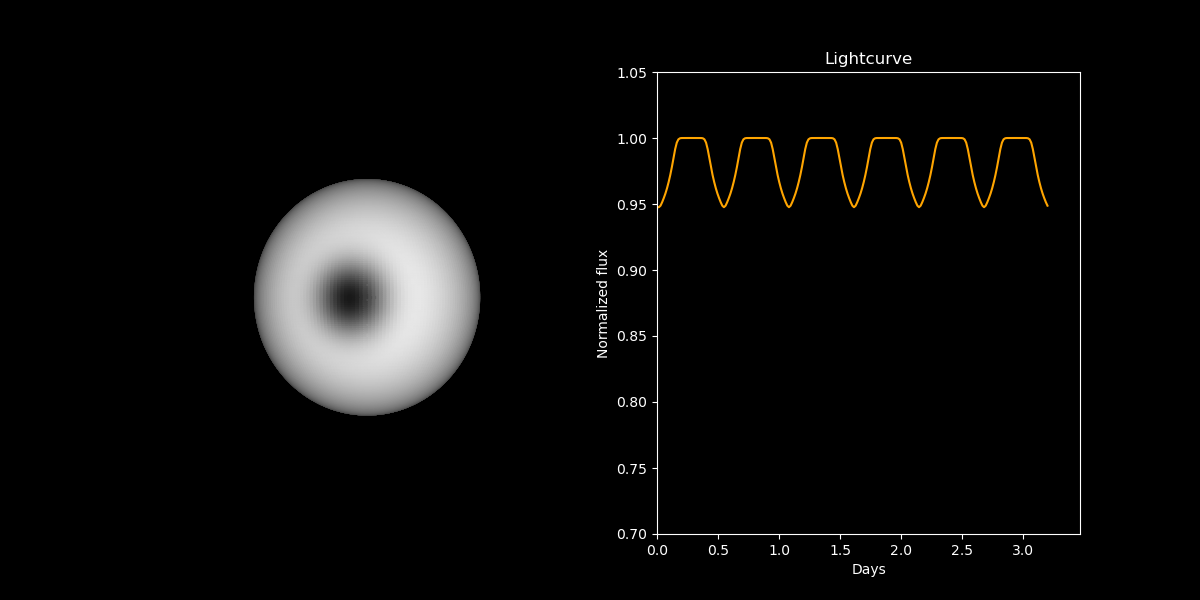

In [1]:
%matplotlib ipympl
import numpy as np
import astropy.units as u
from astropy.constants import R_sun
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from sklearn.preprocessing import normalize

# ---------- FUNCIONES ---------- #

def convertion_radians(degree):
    return np.deg2rad(degree)

def limbdarkening(mu, u):
    return (1 - u * (1 - mu))

def get_spot_theta_rad(initial_deg, angular_velocity, frame, total_frames):
    initial_rad = np.deg2rad(initial_deg)
    delta_theta = angular_velocity * np.pi * frame / total_frames
    return initial_rad + delta_theta

def animate(i, ax_sphere, ax_curve, gray_texture, theta_mesh, phi_mesh, spot_phi_rad, spot_radius_rad, mu, fluxes, elev, azim, x, y, z, spot_theta_deg, line_curve):
    ax_sphere.clear()
    ax_sphere.set_axis_off()
    ax_sphere.view_init(elev=elev, azim=azim)

    texture = np.copy(gray_texture)
    spot_theta_rad = get_spot_theta_rad(spot_theta_deg, 12, i, 240)

    delta_theta = np.arccos(np.cos(theta_mesh - spot_theta_rad))
    delta_phi = np.abs(phi_mesh - spot_phi_rad)
    distance_squared = delta_theta**2 + delta_phi**2
    sigma_squared = (spot_radius_rad / 2)**2
    spot_mask = np.exp(-distance_squared / (2 * sigma_squared))

    texture *= (1 - 0.9 * spot_mask)
    surf = ax_sphere.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(texture), shade=False)

    visible = mu > 0
    total_flux = np.sum(texture[visible])
    fluxes.append(total_flux)

    fluxes_normalized = normalize([fluxes], norm="max")[0]
    line_curve.set_data(np.arange(len(fluxes))/75, fluxes_normalized)

    print(f"Procesando frame {i+1}/240", end='\r')
    return [surf, line_curve]

# ---------- PROGRAMA PRINCIPAL ---------- #

if __name__ == '__main__':
    # Parámetros estelares
    r = 10 * R_sun
    res = 200
    theta = np.linspace(0, 2 * np.pi, res)
    phi = np.linspace(0, np.pi, res)
    theta_mesh, phi_mesh = np.meshgrid(theta, phi)

    x = r * np.sin(phi_mesh) * np.cos(theta_mesh)
    y = r * np.sin(phi_mesh) * np.sin(theta_mesh)
    z = r * np.cos(phi_mesh)

    gray_texture = np.ones((res, res))

    spot_theta_deg = 0
    spot_phi_deg = 90
    spot_radius_deg = 25
    spot_phi_rad = convertion_radians(spot_phi_deg)
    spot_radius_rad = convertion_radians(spot_radius_deg)

    elev = 0
    azim = 0
    elev_rad = convertion_radians(elev)
    azim_rad = convertion_radians(azim)

    v_x = np.cos(elev_rad) * np.cos(azim_rad)
    v_y = np.cos(elev_rad) * np.sin(azim_rad)
    v_z = np.sin(elev_rad)
    mu = (x * v_x + y * v_y + z * v_z) / r
    mu = np.clip(mu, 0, 1)

    constant = 0.8
    lineal_darkening = limbdarkening(mu, constant)
    gray_texture *= lineal_darkening

    # Configuración de la figura
    plt.style.use('dark_background')
    fig = plt.figure(figsize=(12, 6))
    ax_sphere = fig.add_subplot(121, projection='3d')
    ax_curve = fig.add_subplot(122)
    ax_sphere.set_box_aspect((0.98, 1, 0.95))
    ax_sphere.set_axis_off()

    ax_curve.set_title('Lightcurve', color='white')
    ax_curve.set_xlabel('Days')
    ax_curve.set_ylabel('Normalized flux')
    ax_curve.set_xlim(0, 260/75)
    ax_curve.set_ylim(0.7, 1.05)
    ax_curve.set_facecolor('black')
    line_curve, = ax_curve.plot([], [], color='orange')

    fluxes = []

    ani = animation.FuncAnimation(
        fig, animate, frames=240, interval=60, blit=False, repeat=False,
        fargs=(ax_sphere, ax_curve, gray_texture, theta_mesh, phi_mesh, spot_phi_rad,
               spot_radius_rad, mu, fluxes, elev, azim, x, y, z, spot_theta_deg, line_curve)
    )

    ani.save('bar_animation_new.gif', writer='ffmpeg', fps=20)
    plt.show()
